In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Changing Matplotlib Default Parameters¶
Matplotlib's default parameters can be changed with rcParams as follows

In [5]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset

For hands-on we will look at a synthetic dataset predicting baldness. In order to avoid long duration of running time, this time we only take a sample of 1000 data lines.

In [9]:
df = pd.read_csv("Food_Delivery_Dataset.csv")

# Descriptive Statistics

## Checking for missing columns and values with `df.info()`

The first thing that is usually done in EDA is to check the data type of each column and the number of missing values. We can do this using `df.info()`.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          43739 non-null  float64
 3   delivery_person_ratings      43685 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_orderd                  43862 non-null  object 
 10  time_order_picked            45593 non-null  object 
 11  weather_conditions           44977 non-null  object 
 12  road_traffic_density         44992 non-null  object 
 13  vehicle_conditio

## Sampling to Understand the Data using `df.sample()`

In [11]:
df.sample(5)

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
9885,0x3ae3,BANGRES17DEL03,30.0,4.1,12.972532,77.608179,13.062532,77.698179,04-04-2022,17:60,18:10,Fog,Medium,2,Buffet,motorcycle,1.0,No,Metropolitian,31.0
5141,0x926c,JAPRES11DEL01,20.0,4.7,26.902940,75.793007,27.012940,75.903007,20-03-2022,18:55,19:05,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Urban,26.0
35716,0xe020,ALHRES08DEL01,29.0,4.9,25.450329,81.834279,25.460329,81.844279,13-02-2022,11:20,11:35,Sandstorms,High,2,Buffet,motorcycle,0.0,No,Urban,14.0
32735,0x4a4c,PUNERES16DEL01,30.0,4.6,18.536718,73.830327,18.606718,73.900327,23-03-2022,20:20,20:25,Stormy,Jam,0,Drinks,motorcycle,1.0,Yes,Metropolitian,48.0
11979,0x8b2a,RANCHIRES07DEL02,30.0,4.0,23.359407,85.325055,23.409407,85.375055,24-03-2022,18:50,18:55,Stormy,Medium,2,Drinks,scooter,0.0,No,Metropolitian,33.0


In [26]:
# classification of columns based on their type
cats = ['id', 'delivery_person_id', 'weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']
nums = ['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min']
timestamp = ['order_date', 'time_orderd', 'time_order_picked']
geoloc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

In [13]:
df[nums].describe()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken_min
count,43739.000000,43685.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,1.023359,0.744664,26.294607
std,5.815155,0.334716,0.839065,0.572473,9.383806
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [14]:
df[cats].describe()

,id,delivery_person_id,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city
count,45593,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,6,4,4,4,2,3
top,0x6b1a,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7654,15477,11533,26435,44469,34093


In [15]:
df.isna().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_min                    0
dtype: int64

In [16]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom id:
0x6b1a    1
0x255a    1
0x2d96    1
0xb028    1
0x41be    1
         ..
0x4657    1
0x4a7f    1
0x6d2     1
0x26a8    1
0x9b47    1
Name: id, Length: 45593, dtype: int64

Value count kolom delivery_person_id:
JAPRES11DEL02       67
PUNERES01DEL01      67
RANCHIRES02DEL01    66
JAPRES03DEL01       66
VADRES11DEL02       66
                    ..
GOARES01DEL03        7
BHPRES15DEL03        7
KOLRES09DEL03        6
KOCRES16DEL03        6
BHPRES010DEL03       5
Name: delivery_person_id, Length: 1320, dtype: int64

Value count kolom weather_conditions:
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: weather_conditions, dtype: int64

Value count kolom road_traffic_density:
Low       15477
Jam       14143
Medium    10947
High       4425
Name: road_traffic_density, dtype: int64

Value count kolom type_of_order:
Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: type_of_order, dtype:

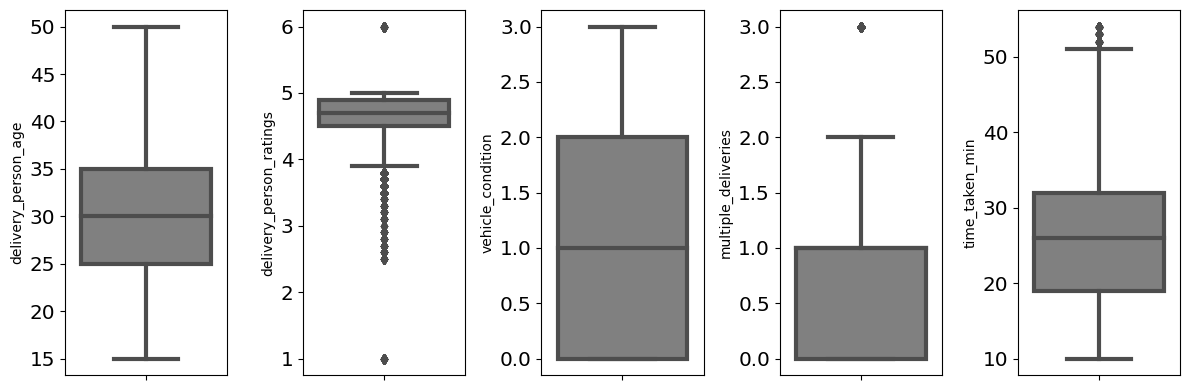

In [17]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_24396\4275355014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='gray')
C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_24396\4275355014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='g

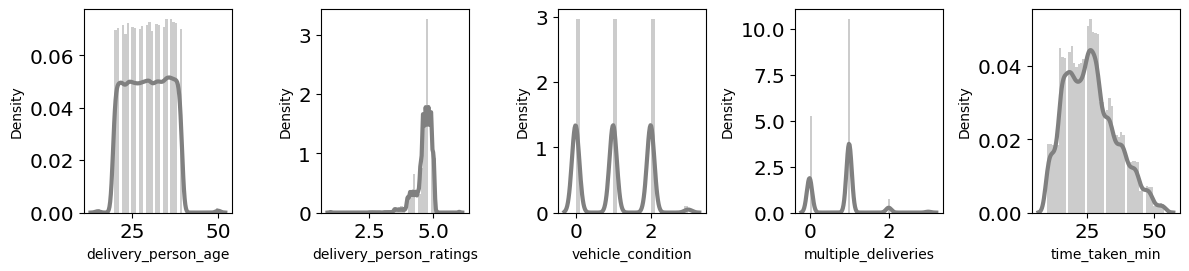

In [18]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

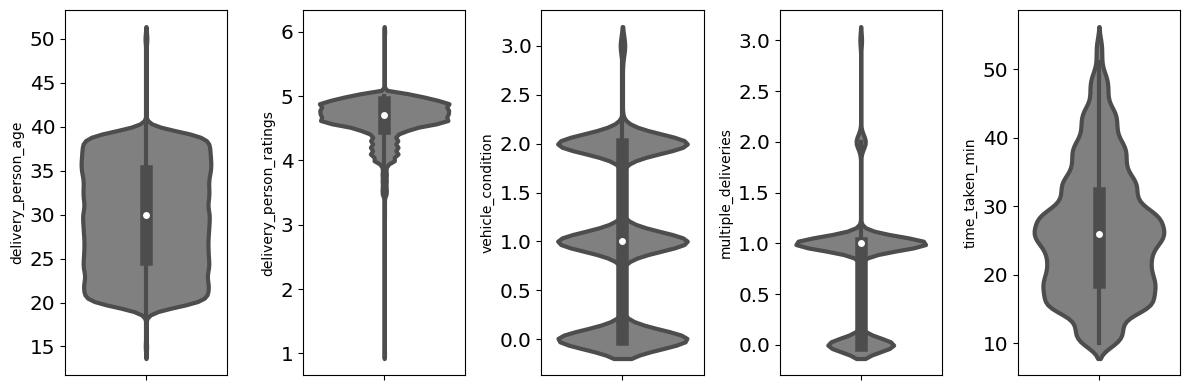

In [19]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

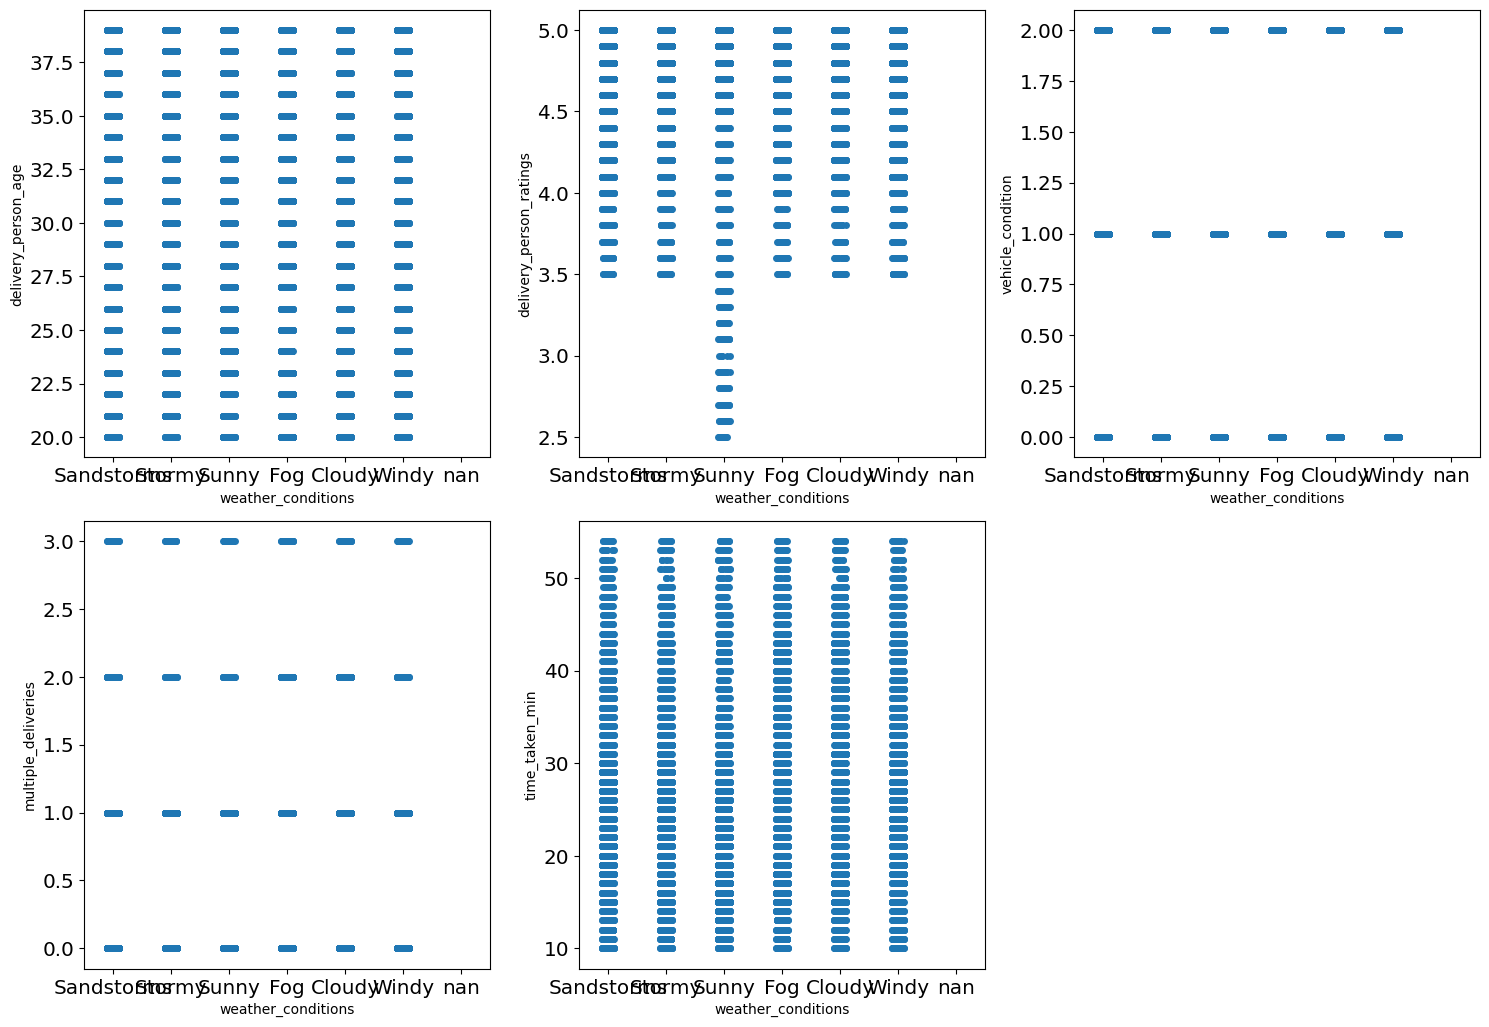

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # for each of numerical columns
    ax = fig.add_subplot(3, 3, i+1) # setting up the catplot/stripplot position in layout
    sns.stripplot(ax=ax, data=df, x='weather_conditions', y=nums[i]) # catplot/stripplot's image
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='city', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

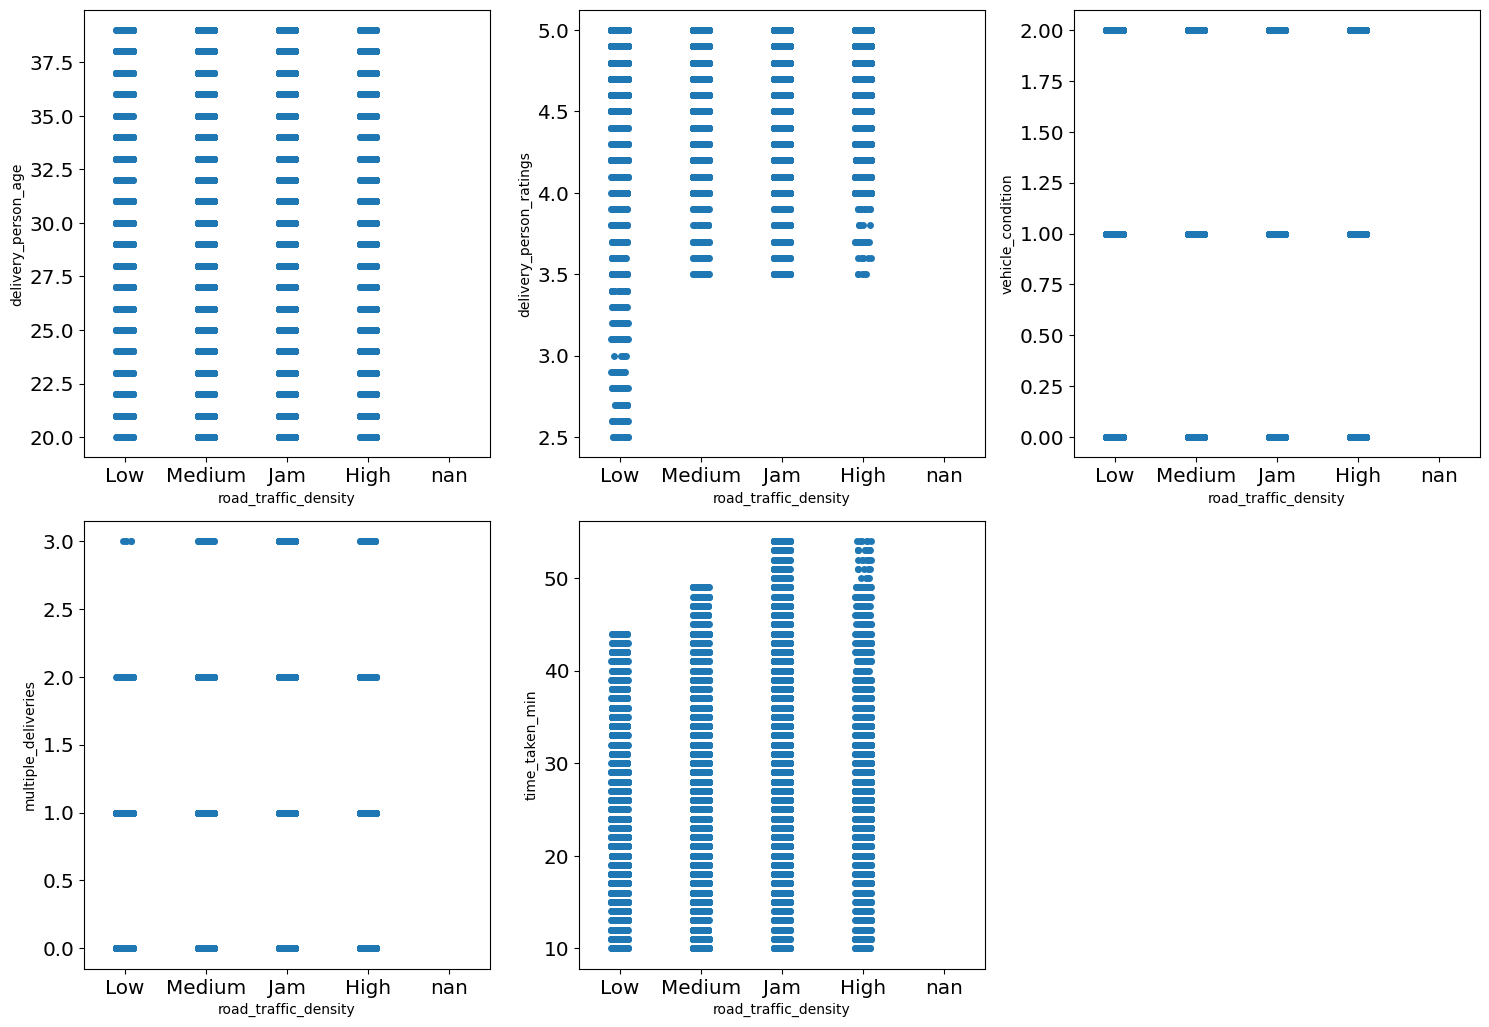

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='road_traffic_density', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

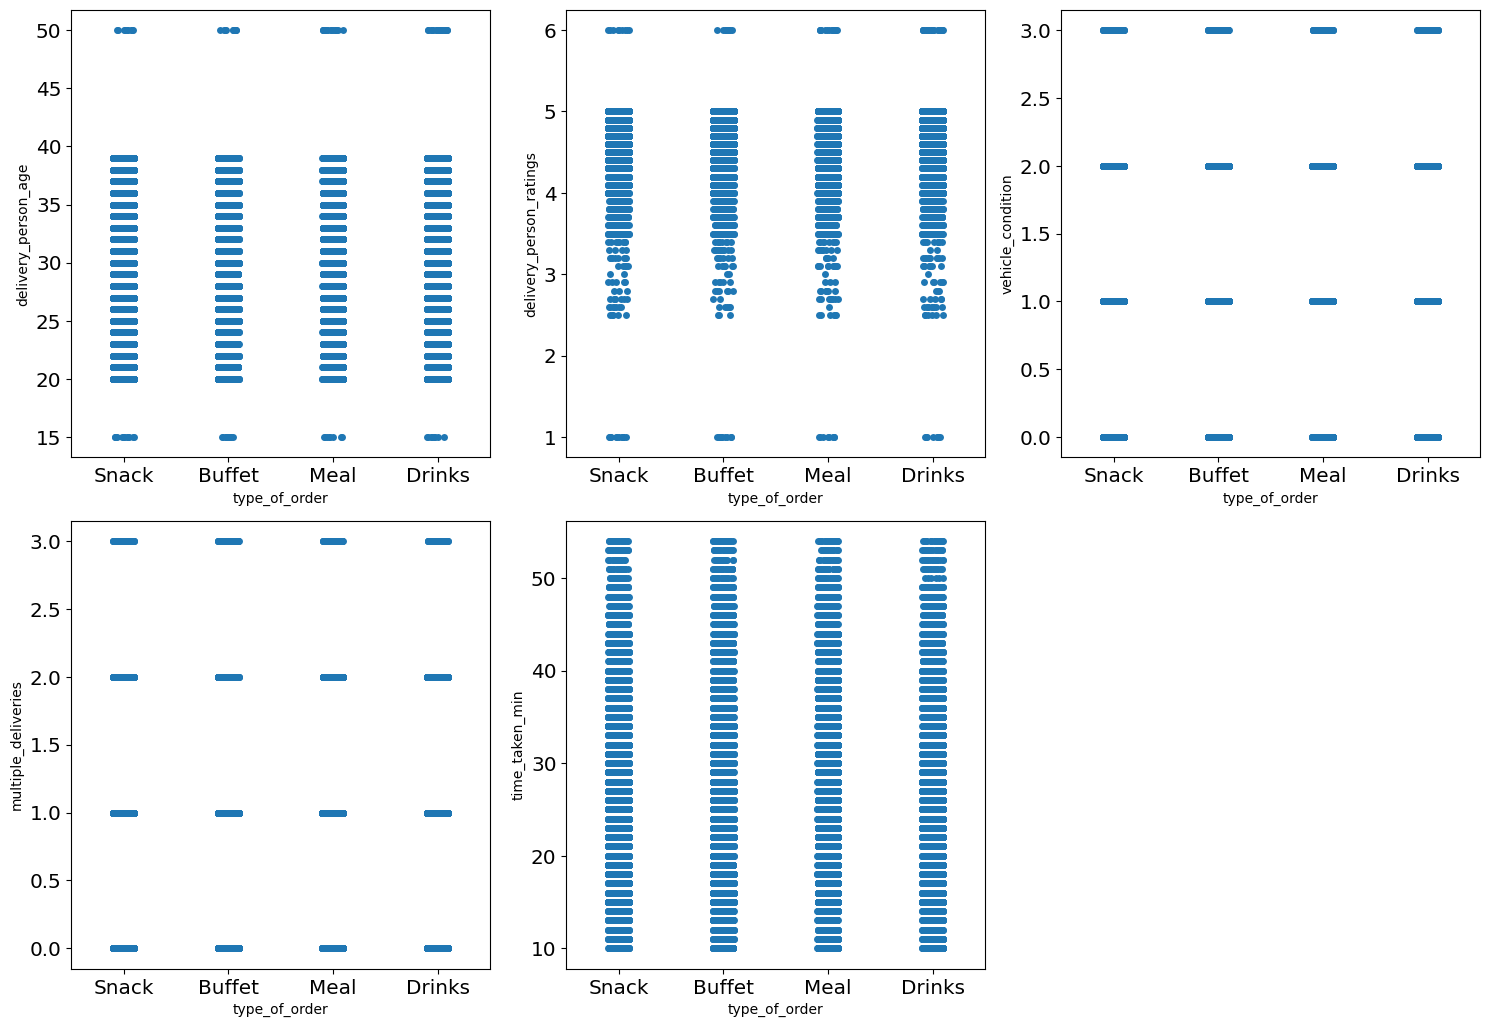

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='type_of_order', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

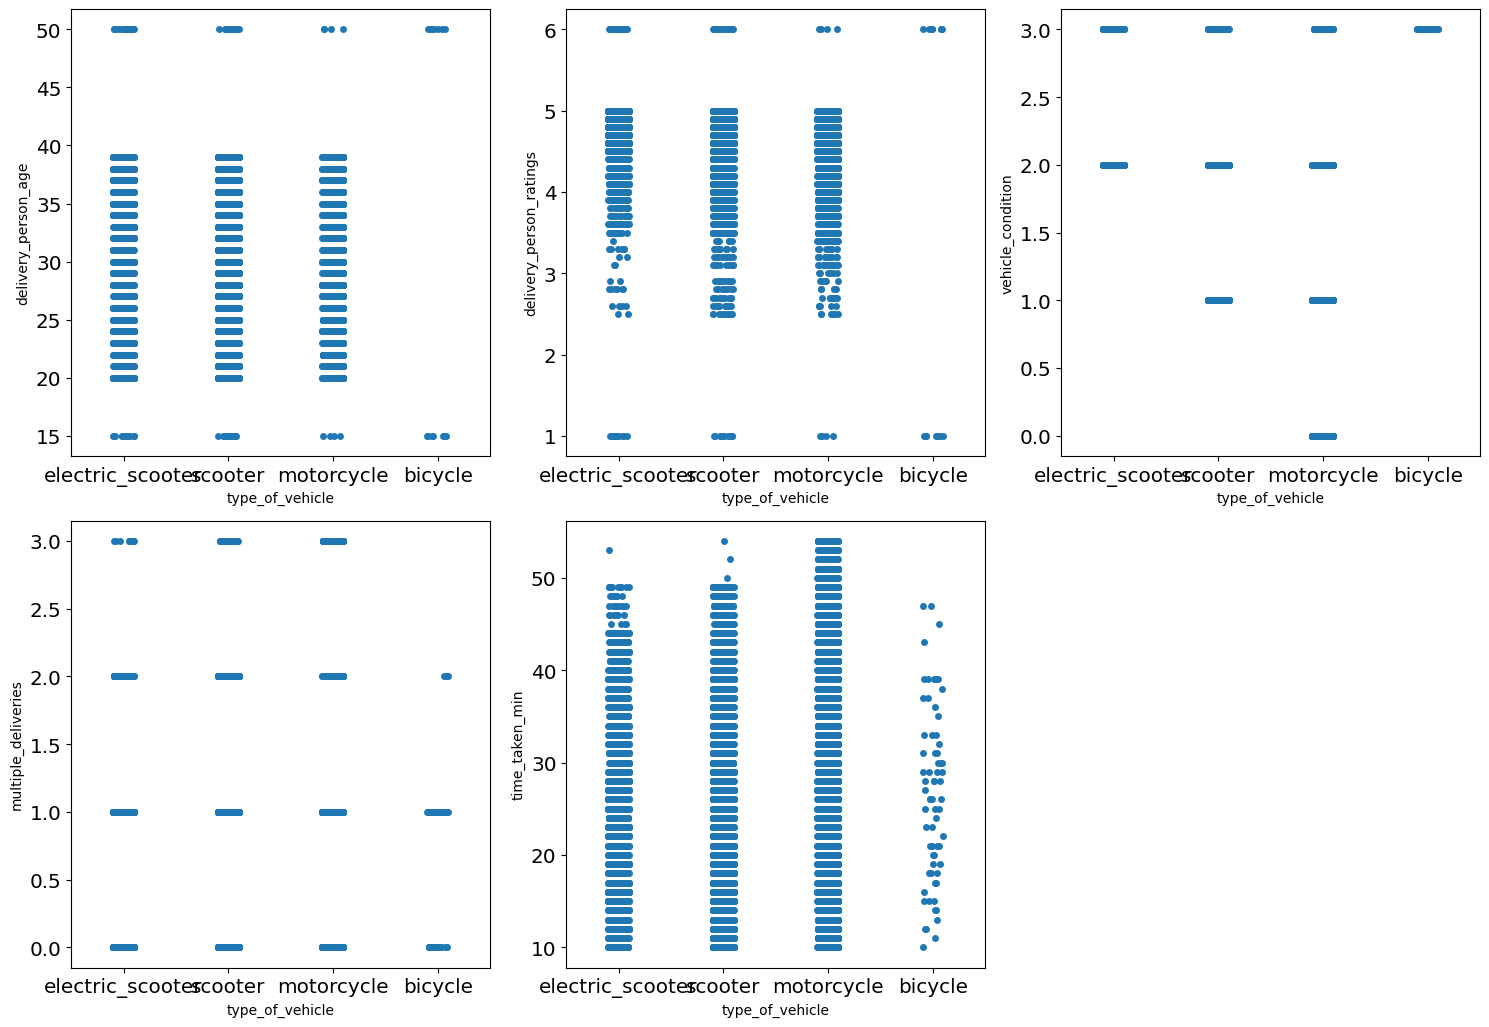

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='type_of_vehicle', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()